In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [5]:
image_path = 'pororo_cool.png'
img = cv.imread(image_path)
height, width, channels = img.shape
print(f"Number of rows (height): {height}")
print(f"Number of columns (width): {width}")
print(f"Number of channels: {channels}")

Number of rows (height): 320
Number of columns (width): 314
Number of channels: 3


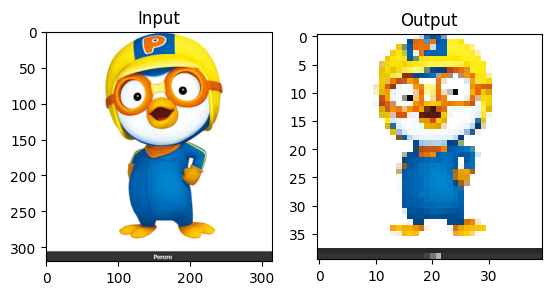

In [6]:
aspect_ratio = img.shape[1] / img.shape[0]
new_width = 40
new_height = int(new_width / aspect_ratio)
resized_image = cv.resize(img, (new_width, new_height))
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized_image_rgb = cv.cvtColor(resized_image, cv.COLOR_BGR2RGB)

# cv.imshow('Original Image', image)
# cv.imshow('Resized Image', resized_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.subplot(1, 2, 1),plt.imshow(img_rgb),plt.title('Input')
plt.subplot(1, 2, 2),plt.imshow(resized_image_rgb),plt.title('Output')
plt.show()

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

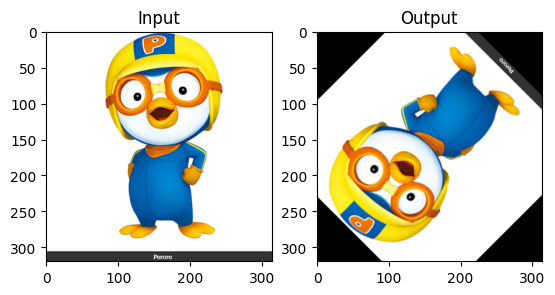

In [7]:
height, width = img.shape[:2]
angle = 135
center = (width // 2, height // 2)
rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv.warpAffine(img, rotation_matrix, (width, height))

# cv.imshow('Original Image', image)
# cv.imshow('Rotated Image', rotated_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rotated_image_rgb = cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1),plt.imshow(img_rgb),plt.title('Input')
plt.subplot(1, 2, 2),plt.imshow(rotated_image_rgb),plt.title('Output')


(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

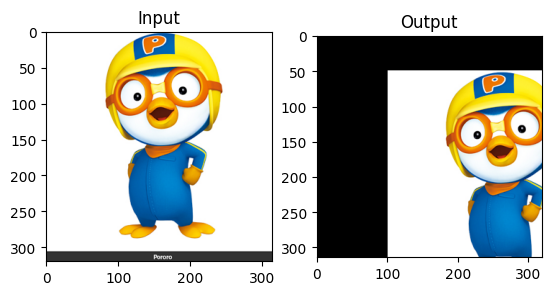

In [8]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(height,width))

# cv.imshow('Original Image', image)
# cv.imshow('img',dst)width}")width}width}")
# cv.waitKey(0)
# cv.destroyAllWindows()

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1),plt.imshow(img_rgb),plt.title('Input')
plt.subplot(1, 2, 2),plt.imshow(dst_rgb),plt.title('Output')

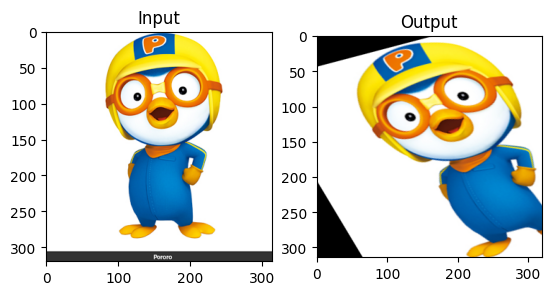

In [9]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(height,width))

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1),plt.imshow(img_rgb),plt.title('Input')
plt.subplot(1, 2, 2),plt.imshow(dst_rgb),plt.title('Output')
plt.show()

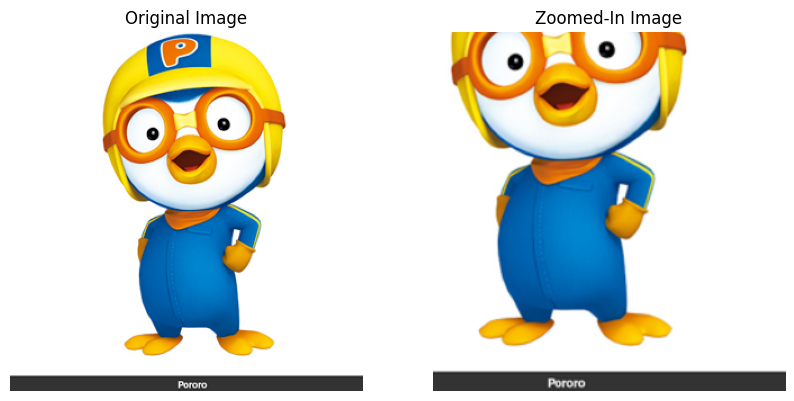

In [10]:
x, y, width, height = 70, 70, 300, 300  
roi = img[y:y+height, x:x+width]


zoomed_in_image = cv.resize(roi, (img.shape[1], img.shape[0]))
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
zoomed_in_image_rgb = cv.cvtColor(zoomed_in_image, cv.COLOR_BGR2RGB)


plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Zoomed-In Image
plt.subplot(1, 2, 2)
plt.imshow(zoomed_in_image_rgb)
plt.title('Zoomed-In Image')
plt.axis('off')

plt.show()

(-0.5, 313.5, 319.5, -0.5)

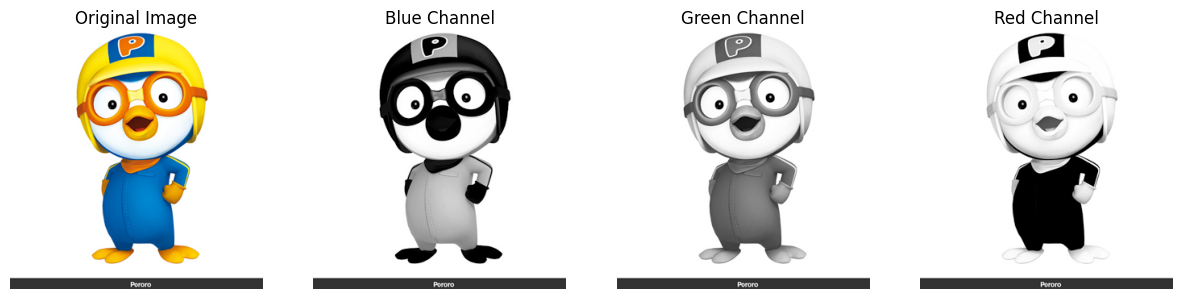

In [11]:
b, g, r = cv.split(img)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
b_rgb = cv.cvtColor(b, cv.COLOR_GRAY2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
r_rgb = cv.cvtColor(r, cv.COLOR_GRAY2RGB)

plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Blue Channel
plt.subplot(1, 4, 2)
plt.imshow(b_rgb)
plt.title('Blue Channel')
plt.axis('off')

# Green Channel
plt.subplot(1, 4, 3)
plt.imshow(g_rgb)
plt.title('Green Channel')
plt.axis('off')

# Red Channel
plt.subplot(1, 4, 4)
plt.imshow(r_rgb)
plt.title('Red Channel')
plt.axis('off')

(<matplotlib.image.AxesImage at 0x20e4c7a0c80>, (-0.5, 313.5, 319.5, -0.5))

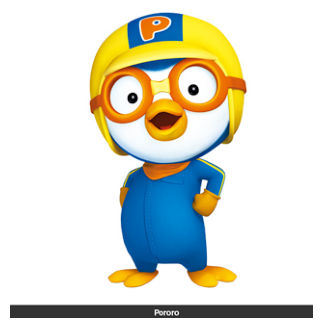

In [12]:
merged = cv.merge([r,g,b])
plt.figure(figsize=(4, 4))
plt.imshow(merged), plt.axis('off')

(<Axes: title={'center': 'Red'}>,
 Text(0.5, 1.0, 'Red'),
 (-0.5, 313.5, 319.5, -0.5))

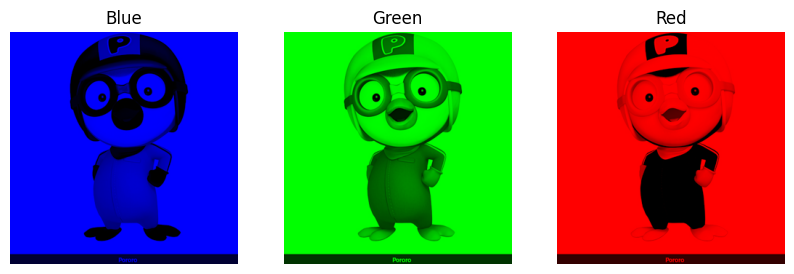

In [13]:
blank = np.zeros(img.shape[:2], dtype=np.uint8)
b, g, r = cv.split(img)

blue = cv.merge([blank, blank, b])
green = cv.merge([blank, g, blank])
red = cv.merge([r, blank, blank])

# cv.imshow('Blue', blue)
# cv.imshow('Green', green)
# cv.imshow('Red', red)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1), plt.imshow(blue), plt.title('Blue'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(green), plt.title('Green'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(red), plt.title('Red'), plt.axis('off')

(<Axes: title={'center': 'Median Blur'}>,
 Text(0.5, 1.0, 'Median Blur'),
 (-0.5, 313.5, 319.5, -0.5))

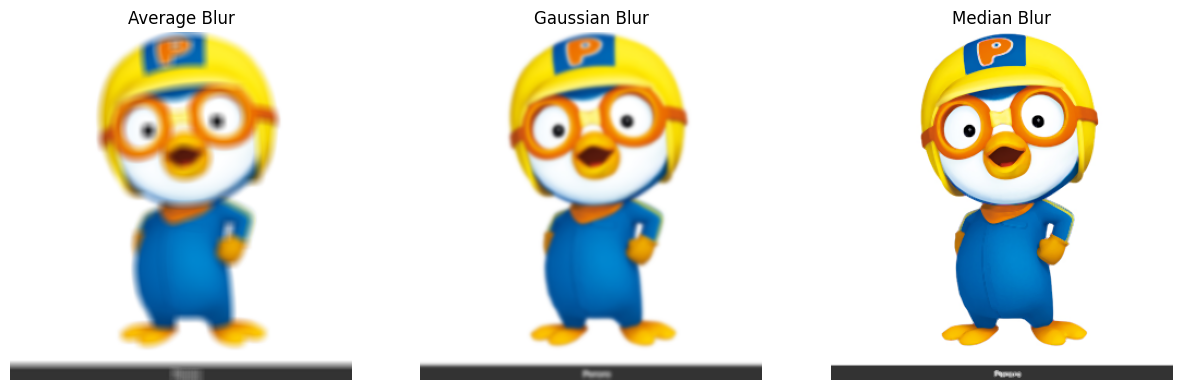

In [14]:
average = cv.blur(img, (9, 9))
average_rgb = cv.cvtColor(average, cv.COLOR_BGR2RGB)
gauss = cv.GaussianBlur(img, (9, 9), 0)
gauss_rgb = cv.cvtColor(gauss, cv.COLOR_BGR2RGB)
median = cv.medianBlur(img, 3)
median_rgb = cv.cvtColor(median, cv.COLOR_BGR2RGB)

# cv.imshow("Average Blur", average)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(average_rgb), plt.title('Average Blur'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(gauss_rgb), plt.title('Gaussian Blur'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(median_rgb), plt.title('Median Blur'), plt.axis('off')

([<matplotlib.lines.Line2D at 0x20e4caa8ef0>], (0.0, 256.0))

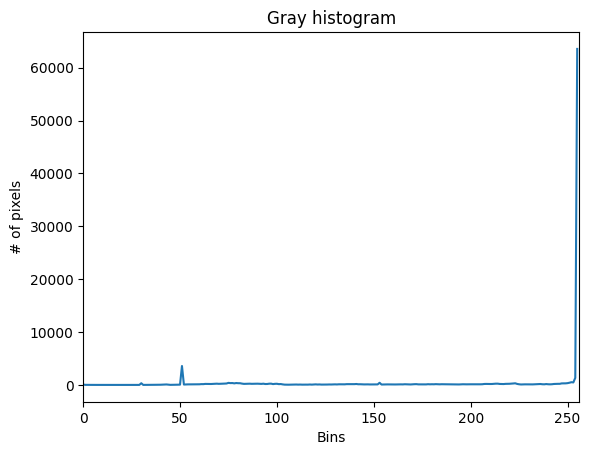

In [15]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.figure, plt.title('Gray histogram'), plt.xlabel('Bins'), plt.ylabel('# of pixels')
plt.plot(gray_hist), plt.xlim([0, 256])

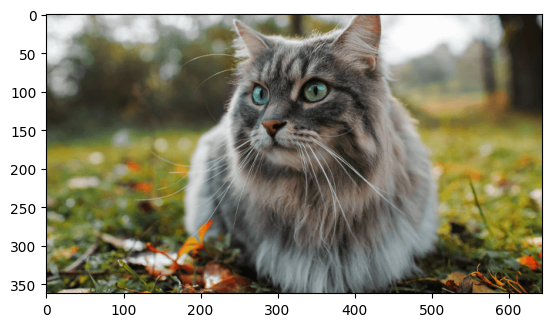

In [16]:
img_cat = cv.imread('grey_cat.png')
img_cat_rgb = cv.cvtColor(img_cat, cv.COLOR_BGR2RGB)
plt.imshow(img_cat_rgb)


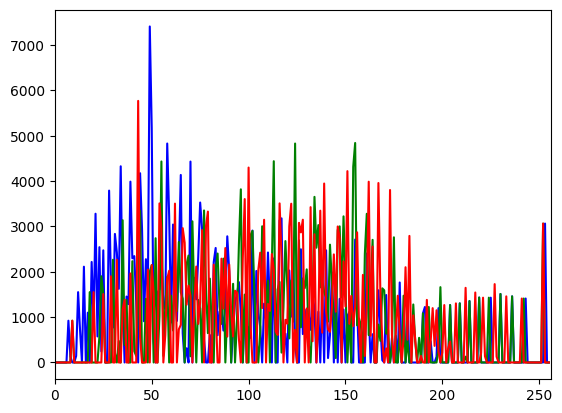

In [17]:
img_cat = cv.imread('grey_cat.png')
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv.calcHist([img_cat], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])

([<matplotlib.lines.Line2D at 0x20e4c994fe0>], (0.0, 256.0))

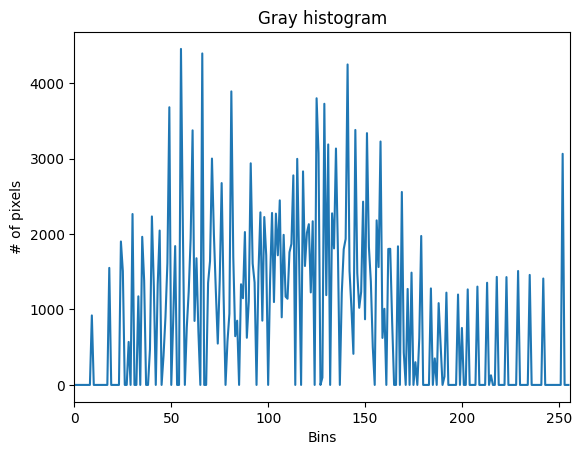

In [18]:
gray = cv.cvtColor(img_cat, cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.figure, plt.title('Gray histogram'), plt.xlabel('Bins'), plt.ylabel('# of pixels')
plt.plot(gray_hist), plt.xlim([0, 256])